In [1]:
# import the libraries

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from IPython.display import Image
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

### Question 1 :-

#### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [2]:
# Read the data

cutlets = pd.read_csv('cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
Unit_A = pd.Series(cutlets.iloc[:,0])
Unit_A

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [4]:
Unit_B = pd.Series(cutlets.iloc[:,1])
Unit_B

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

### Determine the Null and Alternative Hypothesis.

####  H0 : There is no significant difference in the diameter of the cutlet between two units.
####  Ha : There is significant difference in the diameter of the cutlet between two units.

### We will perform the 2 Sample 2 Tail t-tests. 

In [5]:
stats.ttest_ind(Unit_A,Unit_B)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

#### We are given significance level as 0.05

#### Here the pvalue is greater than the significance level, hence we accept the Null hypothesis (H0) i.e. There is no significant difference in the diameter of the cutlet between two units.

###  Question 2 :- 

#### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. 
#### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [6]:
# Read the data

labtat_data = pd.read_csv('LabTAT.csv')
labtat_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [7]:
# Know the average of the data for analysis purpose.
labtat_data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


<Axes: >

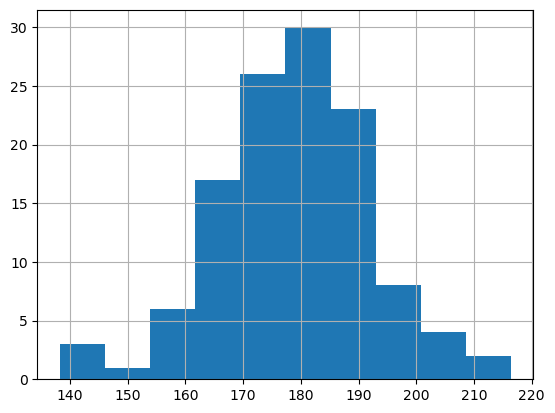

In [8]:
labtat_data['Laboratory 1'].hist()

<Axes: >

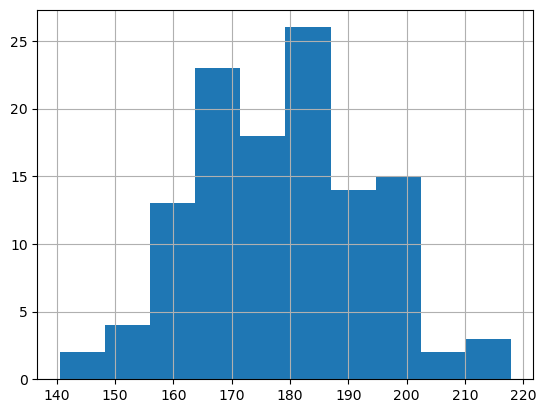

In [9]:
labtat_data['Laboratory 2'].hist()

<Axes: >

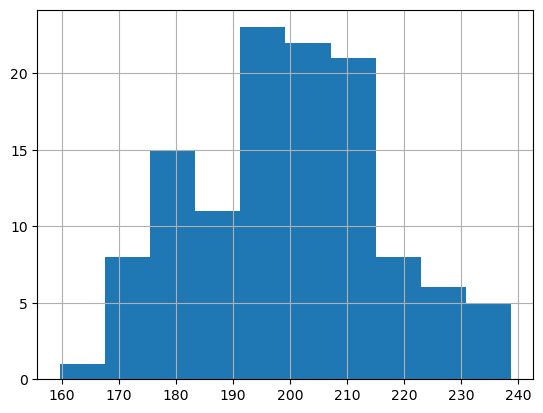

In [10]:
labtat_data['Laboratory 3'].hist()

<Axes: >

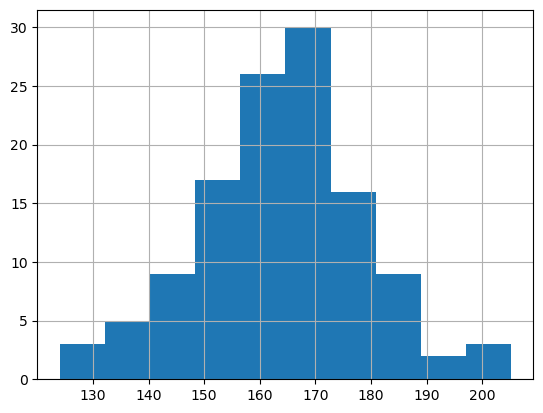

In [11]:
labtat_data['Laboratory 4'].hist()

### Determine the Null and Alternative Hypothesis.

####  H0 : There is same difference in the average Turn Around Time (TAT) of reports of the laboratories i.e. all mean are same (µ1 = µ2 = µ3 = µ4).
####  Ha : There is at least one difference in the average Turn Around Time (TAT) of reports of the laboratories.

### We will perform ANOVA Test

In [12]:
 stats.f_oneway(labtat_data.iloc[:,0],labtat_data.iloc[:,1],labtat_data.iloc[:,2],labtat_data.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#### The p value is 2.1156708949992414e-57 which is less than significance value i.e. 0.05, hence we will reject the null hypothesis (H0) and accept the alternative hypothesis (Ha) which meanst their is difference in average TAT among the different laboratories at 5% significance level.



### Question 3 :-

#### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [13]:
Image(url = "Q3_Picture.JPG", width=600, height=500)

In [14]:
# Read the file
Buyer_data = pd.read_csv("BuyerRatio.csv")
Buyer_data.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


####  H0 : Males and Female ratios are similar i.e. both categorical variables are independent of each other.
####  Ha : Males and Female ratios are not similar i.e. both categorical variables are dependent and there is relationship between two categorical variables. 

### We will perform Chi-Square Test

In [15]:
Observed_Values = Buyer_data
Total_col = Observed_Values.sum(axis = 1)

In [16]:
Observed_Values['Total_Col'] = Total_col
Observed_Values

,Observed Values,East,West,North,South,Total_Col
0,Males,50,142,131,70,393
1,Females,435,1523,1356,750,4064


In [17]:
Total_Row = Observed_Values.sum()
list(Total_Row)
Observed_Values = Observed_Values.append(Total_Row , ignore_index = True)

In [18]:
Observed_Values.loc[2,['Observed Values']] = ['Total_Row']
Observed_Values

,Observed Values,East,West,North,South,Total_Col
0,Males,50,142,131,70,393
1,Females,435,1523,1356,750,4064
2,Total_Row,485,1665,1487,820,4457


In [19]:
# expected frequency = total no. of observation for the row * total no. of observation for the column / total number of 
# observations

In [20]:
Expected_Values = [{"Expected Values" : 'Males',
                  "East" : 393*485/4457 , "West" : 393*1665/4457 , "North" : 393*1487/4457 , "South" : 393*820/4457 ,},
                   {"Expected Values" : 'Females',
                   "East" :  4064*485/4457 , "West": 4064*1665/4457 , "North" : 4064*1487/4457, "South" : 4064*820/4457 }]
Expected_Values = pd.DataFrame(Expected_Values)

In [21]:
Expected_Values

,Expected Values,East,West,North,South
0,Males,42.765313,146.812879,131.117568,72.304241
1,Females,442.234687,1518.187121,1355.882432,747.695759


In [22]:
# X2 = (Oi - Ei)2/Ei

In [23]:
# Calculating the sub group of Male and region East
a = np.square(50-42.765313)/42.765313
a

1.2239053643304099

In [24]:
# Calculating the sub group of Female and region East
b = np.square(435 - 442.234687)/442.234687
b

0.118355021726211

In [25]:
# Calculating the sub group of Male and region West
c = np.square(142 - 146.812879)/146.812879
c

0.15777774011666298

In [26]:
# Calculating the sub group of Female and region West
d = np.square(1523 - 1518.187121)/1518.187121
d

0.015257542333374622

In [27]:
# Calculating the sub group of Male and region North
e = np.square(131 - 131.117568)/131.117568
e

0.00010541863180379712

In [28]:
# Calculating the sub group of Female and region North
f = np.square(1356 - 1355.882432 )/1355.882432
f

1.0194272230215457e-05

In [29]:
# Calculating the sub group of Male and region South
g = np.square(70 - 72.304241 )/72.304241
g

0.07343312802468974

In [30]:
# Calculating the sub group of Female and region South
h = np.square(750 - 747.695759 )/747.695759
h

0.007101185906393804

In [31]:
x2 = a + b + c + d + e + f + g + h
x2

1.595945595341776

#### DF = (no. of rows -1)*(no. of columns -1 ) ; DF =  3
#### Chi square table ( alpha = 0.05 , DF = 3)
#### The critical value is 2.353

#### The Test Statistics 1.595945595341776 is smaller than critical value  2.353.
#### Inference : The test statistics is smaller than the critical value, we accept the null hypothesis . hence the male and female ratio are similar. 

## 2nd Method

### Applying Chi-Square x2 contingency table to convert observed value into expected value

In [32]:
# contingency table

table = [[50,142,131,70],
        [435,1523,1356,750]]

In [33]:
stat,p,dof,expected = chi2_contingency(table)
print(stat,"\n", p,"\n", dof,"\n", expected)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [34]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [35]:
obs_val = np.array([50,142,131,70,435,1523,1356,750])
exp_val = np.array([42.76531299 ,146.81287862,131.11756787  , 72.30424052,442.23468701 ,1518.18712138 ,1355.88243213 ,
                   747.69575948])

In [36]:
statistics , p_value = stats.chisquare(obs_val,exp_val,ddof= 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


In [37]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.810
Independent (fail to reject H0)


### Question 4 :-

#### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer  order forms. Any error in order form renders it defective and has to be reworked before processing.   The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences
#### Minitab File: CustomerOrderForm.mtw


In [38]:
# Read the file
cust_data = pd.read_csv("CustomerOrderForm.csv")
cust_data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


#### H0 : The defective % does not varies by centre i.e. μ1=μ2=μ3=μ4
#### Ha : The defective % al least varies once by centre

### We will perform Chi square test for categorical variable 

In [39]:
print(cust_data['Phillippines'].value_counts(),'\n',cust_data['Indonesia'].value_counts(),'\n',
      cust_data['Malta'].value_counts(),'\n',cust_data['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [40]:
# contingency table

contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [41]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [42]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [43]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [44]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.425
Independent (fail to reject H0)


#### We reject the Null Hypothesis (H0) , i.e. the  defective %  varies by centre